## Machine Learning Assignment 2

In [1]:
#Importing all the required API's
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import pandas as pd     #For general purpose Data Manipulation
import numpy as np  #For some operations - creating vectors and matrices/log transformation
from matplotlib import pyplot as plt #Plotting Box-Whisker --> Outlier Detection
import seaborn as sns  #Plotting Box-Whisker and others
from sklearn.model_selection import train_test_split #For Building Train and Test Set
from sklearn.metrics import confusion_matrix

In [2]:
#Loading Data into a DataFrame
Attrition_rate_DF =pd.read_csv('C:/Users/Amruth PC/Desktop/Assignments_submission/ML/Assignment2_PGD B7/People Charm case.csv')
Attrition_rate_DF.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years   dept  salary  
0                  3             0     1                      0  sales     low  
1                  6             0     1                      0  sales  medium  
2                  4             0     1                      0  sales  medium  
3                  3             0     1                      0  sales     low  
4                  3             0     1                      0  sales     low

In [3]:
Attrition_rate_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
Attrition_rate_DF.describe()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
count       14999.000000    14999.000000      14999.000000     14999.000000   
mean            0.612834        0.716102          3.803054       201.050337   
std             0.248631        0.171169          1.232592        49.943099   
min             0.090000        0.360000          2.000000        96.000000   
25%             0.440000        0.560000          3.000000       156.000000   
50%             0.640000        0.720000          4.000000       200.000000   
75%             0.820000        0.870000          5.000000       245.000000   
max             1.000000        1.000000          7.000000       310.000000   

       timeSpent.company  workAccident          left  promotionInLast5years  
count       14999.000000  14999.000000  14999.000000           14999.000000  
mean            3.498233      0.144610      0.238083               0.021268  
std             1.460136      0.351719      0.425924               0.144281  
min             2.000000      0.000000      0.000000               0.000000  
25%             3.000000      0.000000      0.000000               0.000000  
50%             3.000000      0.000000      0.000000               0.000000  
75%             4.000000      0.000000      0.000000               0.000000  
max            10.000000      1.000000      1.000000               1.000000

In [5]:
#Profiling helped in understanding the dataset individually on every column 
import pandas_profiling as pd_prof

pd_prof.ProfileReport(Attrition_rate_DF)

## Observations :

- There are no missing values in the data set
- Columns such as avgMonthlyHours,satisfactoryLevel and lastEvaluation data is not normally distributed
- Dataset has 3008 (20.1%) duplicate rows

In [6]:
#Removing the duplicates from the dataset by having first row of duplicates
Attrition_rate_DF=Attrition_rate_DF.drop_duplicates()
Attrition_rate_DF=Attrition_rate_DF.reset_index(drop=True)

In [7]:
Attrition_rate_DF

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0                   0.38            0.53                 2              157   
1                   0.80            0.86                 5              262   
2                   0.11            0.88                 7              272   
3                   0.37            0.52                 2              159   
4                   0.41            0.50                 2              153   
5                   0.10            0.77                 6              247   
6                   0.92            0.85                 5              259   
7                   0.42            0.53                 2              142   
8                   0.45            0.54                 2              135   
9                   0.11            0.81                 6              305   
10                  0.36            0.56                 2              137   
11                  0.38            0.54                 2              143   
12                  0.45            0.47                 2              160   
13                  0.78            0.99                 4              255   
14                  0.76            0.89                 5              262   
15                  0.11            0.83                 6              282   
16                  0.09            0.95                 6              304   
17                  0.46            0.57                 2              139   
18                  0.40            0.53                 2              158   
19                  0.89            0.92                 5              242   
20                  0.82            0.87                 4              239   
21                  0.40            0.49                 2              135   
22                  0.38            0.50                 2              132   
23                  0.09            0.62                 6              294   
24                  0.45            0.57                 2              134   
25                  0.40            0.51                 2              145   
26                  0.84            0.87                 4              246   
27                  0.38            0.46                 2              137   
28                  0.45            0.50                 2              126   
29                  0.11            0.89                 6              306   
...                  ...             ...               ...              ...   
11961               0.44            0.56                 3              123   
11962               0.75            0.74                 3              186   
11963               0.81            0.75                 4              206   
11964               0.26            0.37                 2              232   
11965               0.79            0.97                 3              271   
11966               0.56            0.62                 3              154   
11967               0.10            0.93                 6              269   
11968               0.59            0.76                 3              264   
11969               0.66            0.98                 4              163   
11970               0.68            0.75                 5              243   
11971               0.95            0.86                 5              143   
11972               0.82            0.97                 4              243   
11973               0.73            0.60                 3              145   
11974               0.57            1.00                 3              241   
11975               0.97            0.66                 4              218   
11976               0.21            0.62                 4              247   
11977               0.64            0.50                 3              238   
11978               0.88            0.75                 4              201   
11979               0.97            0.55                 

In [8]:
pd_prof.ProfileReport(Attrition_rate_DF)

In [9]:
dict(Attrition_rate_DF.dtypes)

{'satisfactoryLevel': dtype('float64'),
 'lastEvaluation': dtype('float64'),
 'numberOfProjects': dtype('int64'),
 'avgMonthlyHours': dtype('int64'),
 'timeSpent.company': dtype('int64'),
 'workAccident': dtype('int64'),
 'left': dtype('int64'),
 'promotionInLast5years': dtype('int64'),
 'dept': dtype('O'),
 'salary': dtype('O')}

In [10]:
# Creating a new dataset with only numeric columns and variable columns
numeric_var_names=[key for key in dict(Attrition_rate_DF.dtypes) if dict(Attrition_rate_DF.dtypes)[key] in ['float64', 'int64']]
catag_var_names=[key for key in dict(Attrition_rate_DF.dtypes) if dict(Attrition_rate_DF.dtypes)[key] in [ 'O']]
print(numeric_var_names)
print(catag_var_names)

['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left', 'promotionInLast5years']
['dept', 'salary']


In [11]:
Attrition_rate_DF_Num=Attrition_rate_DF[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left', 'promotionInLast5years']]

In [12]:
Attrition_rate_DF_Cat=Attrition_rate_DF[['dept', 'salary']]

In [13]:
Attrition_rate_DF_Num.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years  
0                  3             0     1                      0  
1                  6             0     1                      0  
2                  4             0     1                      0  
3                  3             0     1                      0  
4                  3             0     1                      0

In [14]:
Attrition_rate_DF_Cat.head()

dept  salary
0  sales     low
1  sales  medium
2  sales  medium
3  sales     low
4  sales     low

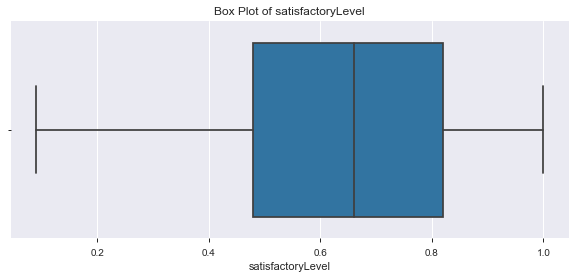

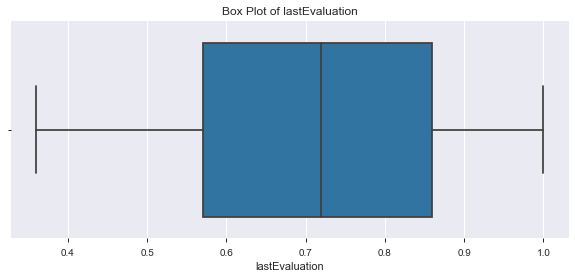

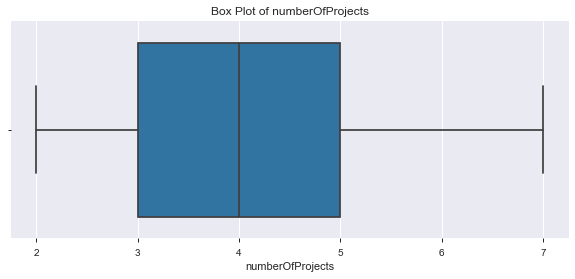

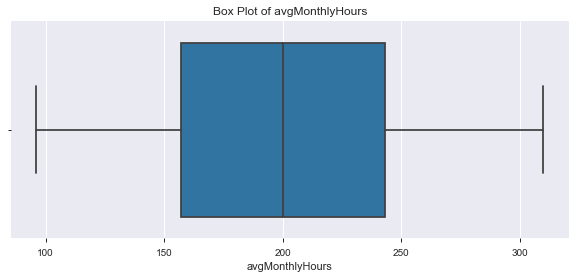

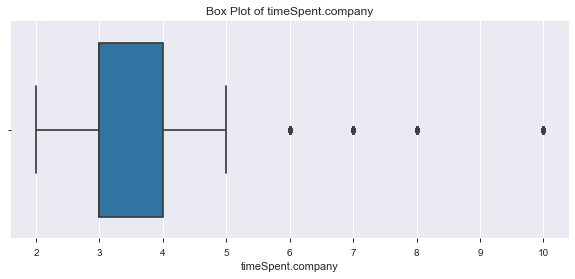

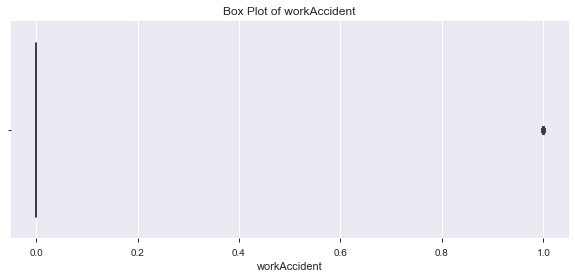

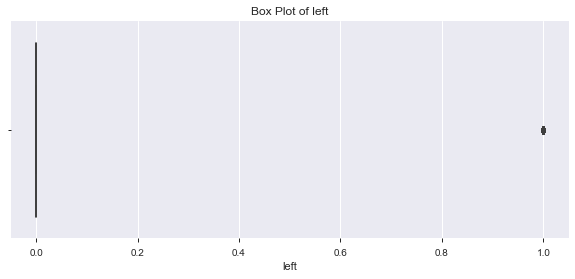

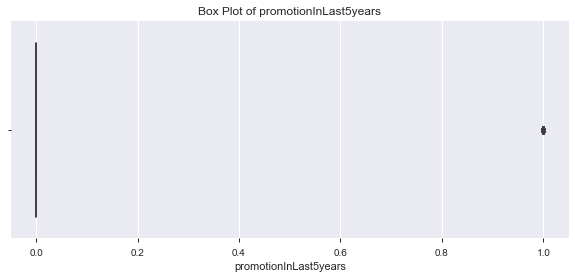

In [15]:
#Checking box plots to undestand the outliers resent in the numerical columns
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = Attrition_rate_DF_Num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [16]:
#timeSpent.company is having outliers according to box plot
#Capping to remove outliers in all numerical columns
def outlier_capping(x):
    ul = x.quantile(0.75)+1.5*(x.quantile(0.75)-x.quantile(0.25))
    ll = x.quantile(0.25)-1.5*(x.quantile(0.75)-x.quantile(0.25))
    x = x.clip_upper(ul)
    x = x.clip_lower(ll)
    return x

Attrition_rate_DF_Num[['timeSpent.company']]=Attrition_rate_DF_Num[['timeSpent.company']].apply(lambda x: outlier_capping(x))
Attrition_rate_DF_Num.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years  
0                3.0             0     1                      0  
1                5.5             0     1                      0  
2                4.0             0     1                      0  
3                3.0             0     1                      0  
4                3.0             0     1                      0

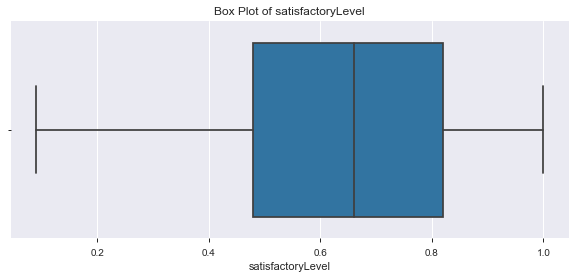

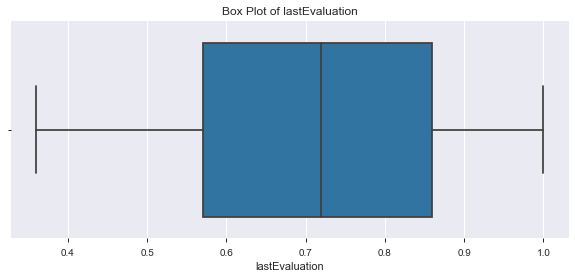

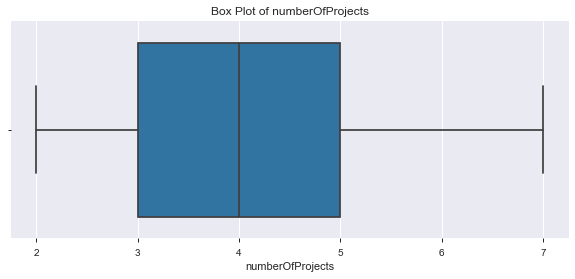

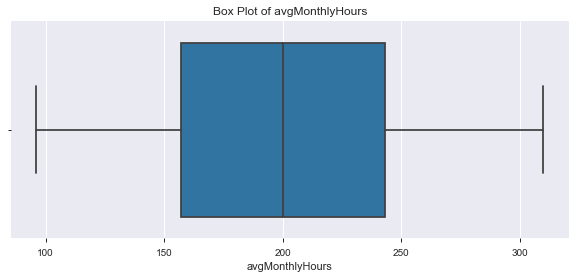

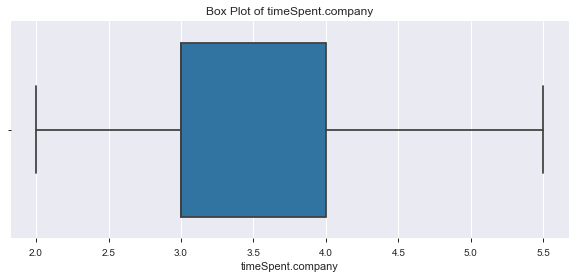

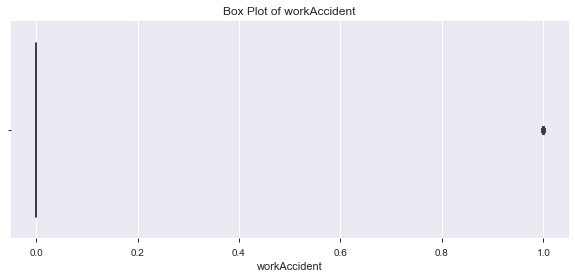

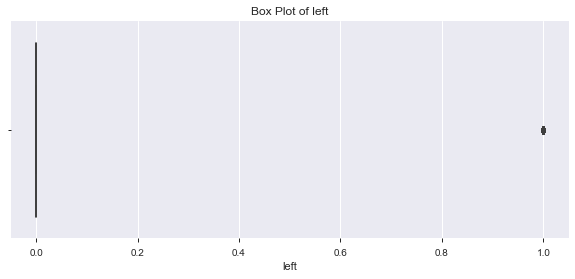

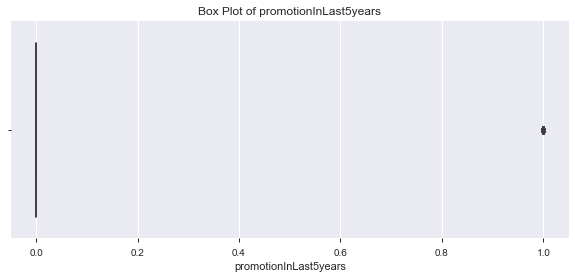

In [17]:
for num_variable in numeric_var_names:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot( x=num_variable, data = Attrition_rate_DF_Num)
    plt.title(str('Box Plot of ') + str(num_variable))

In [18]:
#Model after control the outliers
Attrition_rate_DF_Updated = pd.concat([Attrition_rate_DF_Num, Attrition_rate_DF_Cat], axis=1)
Attrition_rate_DF_Updated.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years   dept  salary  
0                3.0             0     1                      0  sales     low  
1                5.5             0     1                      0  sales  medium  
2                4.0             0     1                      0  sales  medium  
3                3.0             0     1                      0  sales     low  
4                3.0             0     1                      0  sales     low

In [19]:
#Applying Label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
Attrition_rate_DF_Updated['salary']=labelencoder_X.fit_transform(Attrition_rate_DF_Updated['salary'])

In [20]:
Attrition_rate_DF_Updated.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years   dept  salary  
0                3.0             0     1                      0  sales       1  
1                5.5             0     1                      0  sales       2  
2                4.0             0     1                      0  sales       2  
3                3.0             0     1                      0  sales       1  
4                3.0             0     1                      0  sales       1

In [21]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(Attrition_rate_DF_Updated['dept'], prefix = 'dept')
# Drop column B as it is now encoded
Attrition_rate_DF_Updated = Attrition_rate_DF_Updated.drop('dept',axis = 1)
# Join the encoded df
Attrition_rate_DF_Updated = Attrition_rate_DF_Updated.join(one_hot)

In [22]:
Attrition_rate_DF_Updated.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical'],
      dtype='object')

In [23]:
#Creating X and Y data
X=Attrition_rate_DF_Updated[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]
Y=Attrition_rate_DF_Updated[['left']]

In [24]:
#Standardizing the data(Feature Scaling)-Normalizing the data
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [25]:
Attrition_rate_DF_Normalized=pd.DataFrame(X)
Attrition_rate_DF_Normalized.columns=['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']

In [26]:
Attrition_rate_DF_Normalized.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0          -1.035668       -1.108990         -1.549921        -0.892208   
1           0.706637        0.851380          1.029194         1.262709   
2          -2.155721        0.970190          2.748604         1.467939   
3          -1.077151       -1.168396         -1.549921        -0.851162   
4          -0.911218       -1.287206         -1.549921        -0.974300   

   timeSpent.company  workAccident  promotionInLast5years    salary   dept_IT  \
0          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   
1           2.104952     -0.427116              -0.131228  1.025111 -0.297668   
2           0.686868     -0.427116              -0.131228  1.025111 -0.297668   
3          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   
4          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   

   dept_RandD  dept_accounting   dept_hr  dept_management  dept_marketing  \
0   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
1   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
2   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
3   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
4   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   

   dept_product_mng  dept_sales  dept_support  dept_technical  
0         -0.246335    1.643797      -0.42315       -0.479817  
1         -0.246335    1.643797      -0.42315       -0.479817  
2         -0.246335    1.643797      -0.42315       -0.479817  
3         -0.246335    1.643797      -0.42315       -0.479817  
4         -0.246335    1.643797      -0.42315       -0.479817

In [27]:
Attrition_rate_DF_Normalized=Attrition_rate_DF_Normalized[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'salary', 'dept_IT', 'dept_RandD',
       'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing',
       'dept_product_mng', 'dept_sales', 'dept_support']]

In [28]:
Attrition_rate_DF_Normalized.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0          -1.035668       -1.108990         -1.549921        -0.892208   
1           0.706637        0.851380          1.029194         1.262709   
2          -2.155721        0.970190          2.748604         1.467939   
3          -1.077151       -1.168396         -1.549921        -0.851162   
4          -0.911218       -1.287206         -1.549921        -0.974300   

   timeSpent.company  workAccident  promotionInLast5years    salary   dept_IT  \
0          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   
1           2.104952     -0.427116              -0.131228  1.025111 -0.297668   
2           0.686868     -0.427116              -0.131228  1.025111 -0.297668   
3          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   
4          -0.258522     -0.427116              -0.131228 -0.567131 -0.297668   

   dept_RandD  dept_accounting   dept_hr  dept_management  dept_marketing  \
0   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
1   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
2   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
3   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   
4   -0.247855        -0.233704 -0.229708        -0.194249        -0.24385   

   dept_product_mng  dept_sales  dept_support  
0         -0.246335    1.643797      -0.42315  
1         -0.246335    1.643797      -0.42315  
2         -0.246335    1.643797      -0.42315  
3         -0.246335    1.643797      -0.42315  
4         -0.246335    1.643797      -0.42315

In [29]:
#Applied PCA but all the columns looks similarly important so going with the actual data set 
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
Data_X=pca.fit_transform(Attrition_rate_DF_Normalized)
print(pca.explained_variance_ratio_)

[0.1008799  0.07588619 0.07053757 0.06871392 0.0664476  0.06398643
 0.06313912 0.06251882 0.06223556 0.06193564 0.0583321  0.05719464
 0.05151202 0.04612249 0.04087694 0.0368479  0.01283316]


In [30]:
X=Attrition_rate_DF_Normalized
Y=Attrition_rate_DF_Updated[['left']]

In [31]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

# KNN Classifier

In [32]:
#import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
print(knnclassifier.fit(x_train,y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [33]:
#Predicting the values using KNN Classifier
y_pred=knnclassifier.predict(x_test)

In [34]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
print("KNN Classifier Score=",knnclassifier.score(x_test,y_test)*100)
cm

KNN Classifier Score= 95.12296790329304


array([[1939,   68],
       [  49,  343]], dtype=int64)

In [35]:
#Calculating the accuracy score to just crosscheck
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9512296790329304

In [36]:
ROC_ls=[]
Acc_ls=[]

In [37]:
#Building ROC Curve for KNN Classifier
ROC_ls=[]
Acc_ls=[]
from sklearn import metrics
probab=knnclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area under the curve :',roc_auc)
Acc_ls.append(('KNNclassifier',knnclassifier.score(x_test,y_test)*100))
ROC_ls.append(('KNNclassifier',roc_auc))
threshold

Area under the curve : 0.9487946523901041


array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

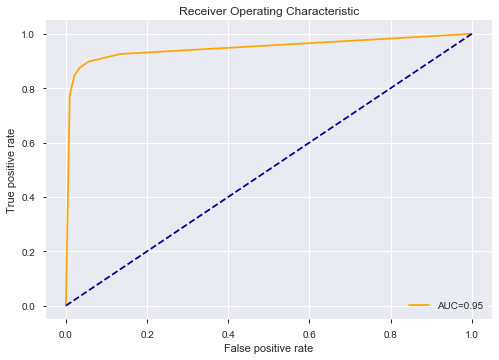

In [38]:
#Ploting the ROC Curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Logistic Regression

In [39]:
#Importing Logistic Classifier
from sklearn.linear_model import LogisticRegression
logclassifier=LogisticRegression()
logclassifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#Predicting the Y values for test set
y_pred=logclassifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
#Building the Confusion matrix
cm=confusion_matrix(y_test,y_pred)
print("Logistic Classifier Score=",logclassifier.score(x_test,y_test)*100)
cm

Logistic Classifier Score= 83.65985827428095


array([[1923,   84],
       [ 308,   84]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8365985827428095

In [43]:
#Building the ROC details
from sklearn import metrics
probab=logclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('Logisticclassifier',logclassifier.score(x_test,y_test)*100))
ROC_ls.append(('Logisticclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.8595667714021333


array([1.84206613e+00, 8.42066126e-01, 7.87255971e-01, 7.80351300e-01,
       7.32238623e-01, 7.13284351e-01, 7.02767560e-01, 6.97974171e-01,
       6.91569131e-01, 6.85772102e-01, 6.76336827e-01, 6.75440229e-01,
       6.60536908e-01, 6.57849832e-01, 6.42011075e-01, 6.41342786e-01,
       6.38396855e-01, 6.36117744e-01, 6.28900656e-01, 6.26174609e-01,
       6.24680134e-01, 6.22957238e-01, 6.02071230e-01, 6.01370829e-01,
       6.00911046e-01, 5.99362008e-01, 5.98284327e-01, 5.97756979e-01,
       5.92887079e-01, 5.90422259e-01, 5.89648177e-01, 5.81243109e-01,
       5.80408060e-01, 5.78084403e-01, 5.77565191e-01, 5.77337605e-01,
       5.77046071e-01, 5.73829175e-01, 5.73778512e-01, 5.70509442e-01,
       5.68958069e-01, 5.66271591e-01, 5.65538249e-01, 5.62362287e-01,
       5.59387673e-01, 5.56674074e-01, 5.56464216e-01, 5.51426741e-01,
       5.50863878e-01, 5.49564279e-01, 5.49424097e-01, 5.49193452e-01,
       5.48765917e-01, 5.35500250e-01, 5.34973634e-01, 5.32712012e-01,
      

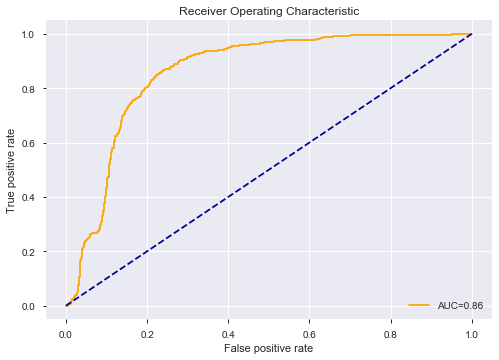

In [44]:
#Ploting the ROC Curve for logistic regression
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# For naive Bayes we need to make few changes to our data set because one hot need not to be applied we are reverting to the old dataset with label encoding

In [45]:
#Loding the old dataset
X_naive=pd.concat([Attrition_rate_DF_Num, Attrition_rate_DF_Cat], axis=1)

In [46]:
X_naive.head()

satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
0               0.38            0.53                 2              157   
1               0.80            0.86                 5              262   
2               0.11            0.88                 7              272   
3               0.37            0.52                 2              159   
4               0.41            0.50                 2              153   

   timeSpent.company  workAccident  left  promotionInLast5years   dept  salary  
0                3.0             0     1                      0  sales     low  
1                5.5             0     1                      0  sales  medium  
2                4.0             0     1                      0  sales  medium  
3                3.0             0     1                      0  sales     low  
4                3.0             0     1                      0  sales     low

In [47]:
#Applying Label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
X_naive['salary']=labelencoder_X.fit_transform(X_naive['salary'])
X_naive['dept']=labelencoder_X.fit_transform(X_naive['dept'])

In [48]:
X_naive.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [49]:
naive_X=X_naive[['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident',
       'promotionInLast5years', 'dept', 'salary']]
naive_Y=X_naive[['left']]

In [50]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(naive_X,naive_Y,test_size=0.20,random_state=40)

In [51]:
gnbclassifier=GaussianNB()
gnbclassifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
print("Guassian Score=",gnbclassifier.score(x_test,y_test)*100)
prediction = gnbclassifier.predict(x_test)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Guassian Score= 83.8682784493539
Confusion Matrix is :
[[1737  272]
 [ 115  275]]


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.838682784493539

In [54]:
from sklearn import metrics
probab=gnbclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('GaussianNBclassifier',gnbclassifier.score(x_test,y_test)*100))
ROC_ls.append(('GaussianNBclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.8567293333843857


array([1.99921756e+00, 9.99217558e-01, 9.91483497e-01, 9.90869936e-01,
       9.88293674e-01, 9.88252849e-01, 9.84876130e-01, 9.84251879e-01,
       9.84113854e-01, 9.84009618e-01, 9.79972806e-01, 9.79816998e-01,
       9.77613476e-01, 9.76655814e-01, 9.76371800e-01, 9.75456137e-01,
       9.75308534e-01, 9.73967735e-01, 9.73842581e-01, 9.71743613e-01,
       9.70105292e-01, 9.54992367e-01, 9.54241684e-01, 9.54163137e-01,
       9.51894541e-01, 9.44971918e-01, 9.43392576e-01, 9.43301064e-01,
       9.43067657e-01, 9.35160336e-01, 9.35016217e-01, 9.23462496e-01,
       9.19544062e-01, 9.19532473e-01, 9.18571068e-01, 9.11164869e-01,
       9.09234443e-01, 8.53741415e-01, 8.52773116e-01, 7.99798202e-01,
       7.98128870e-01, 7.87612903e-01, 7.85754689e-01, 7.65063112e-01,
       7.64393716e-01, 7.55779895e-01, 7.54759135e-01, 7.52328480e-01,
       7.50079523e-01, 7.48771245e-01, 7.44633837e-01, 7.40973381e-01,
       7.40772419e-01, 7.38382747e-01, 7.37343837e-01, 7.35278147e-01,
      

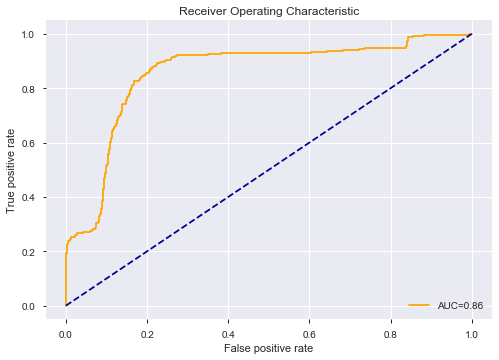

In [55]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [56]:
#Reverting the data to one hot encoding format as rest all classifications need this format
X=Attrition_rate_DF_Normalized
Y=Attrition_rate_DF_Updated[['left']]

In [57]:
#Spliting the data set into train and test models
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=40)

# Decision Tree

In [58]:
# Importing the Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='gini',random_state=0 )
DTClassifier.fit(x_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [59]:
# Predicting the y-values for x_test set
prediction = DTClassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# Building the confusion matrix
from sklearn.metrics import confusion_matrix
print("Decision Tree Score=",DTClassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Decision Tree Score= 96.95706544393498
Confusion Matrix is :
[[1976   33]
 [  40  350]]


In [61]:
cols=X.columns.values

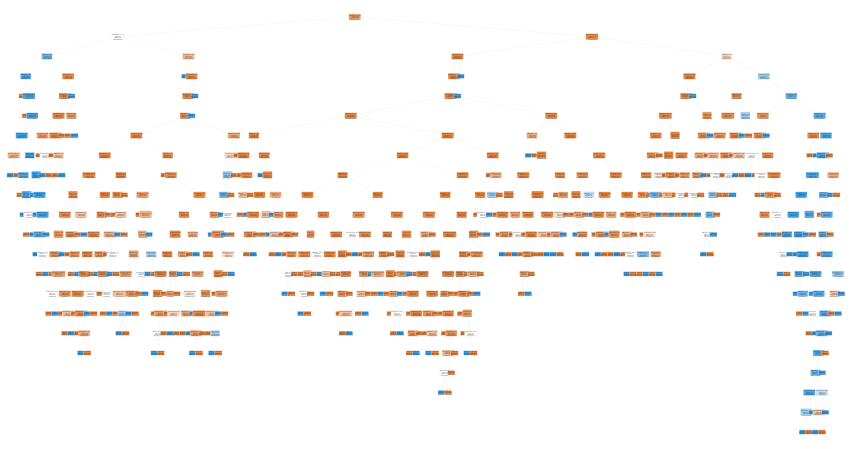

In [62]:
#Building the tree structure
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
tree.plot_tree(DTClassifier.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [86]:
#Controling the nodes ,leafs and depths to overcome over fitting
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=14,min_samples_leaf=5,max_depth=7)
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [87]:
#Predicting the y values for x_test set
prediction = DTClassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix
print("Decision Tree Score=",DTClassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Decision Tree Score= 97.74906210921218
Confusion Matrix is :
[[1998   11]
 [  43  347]]


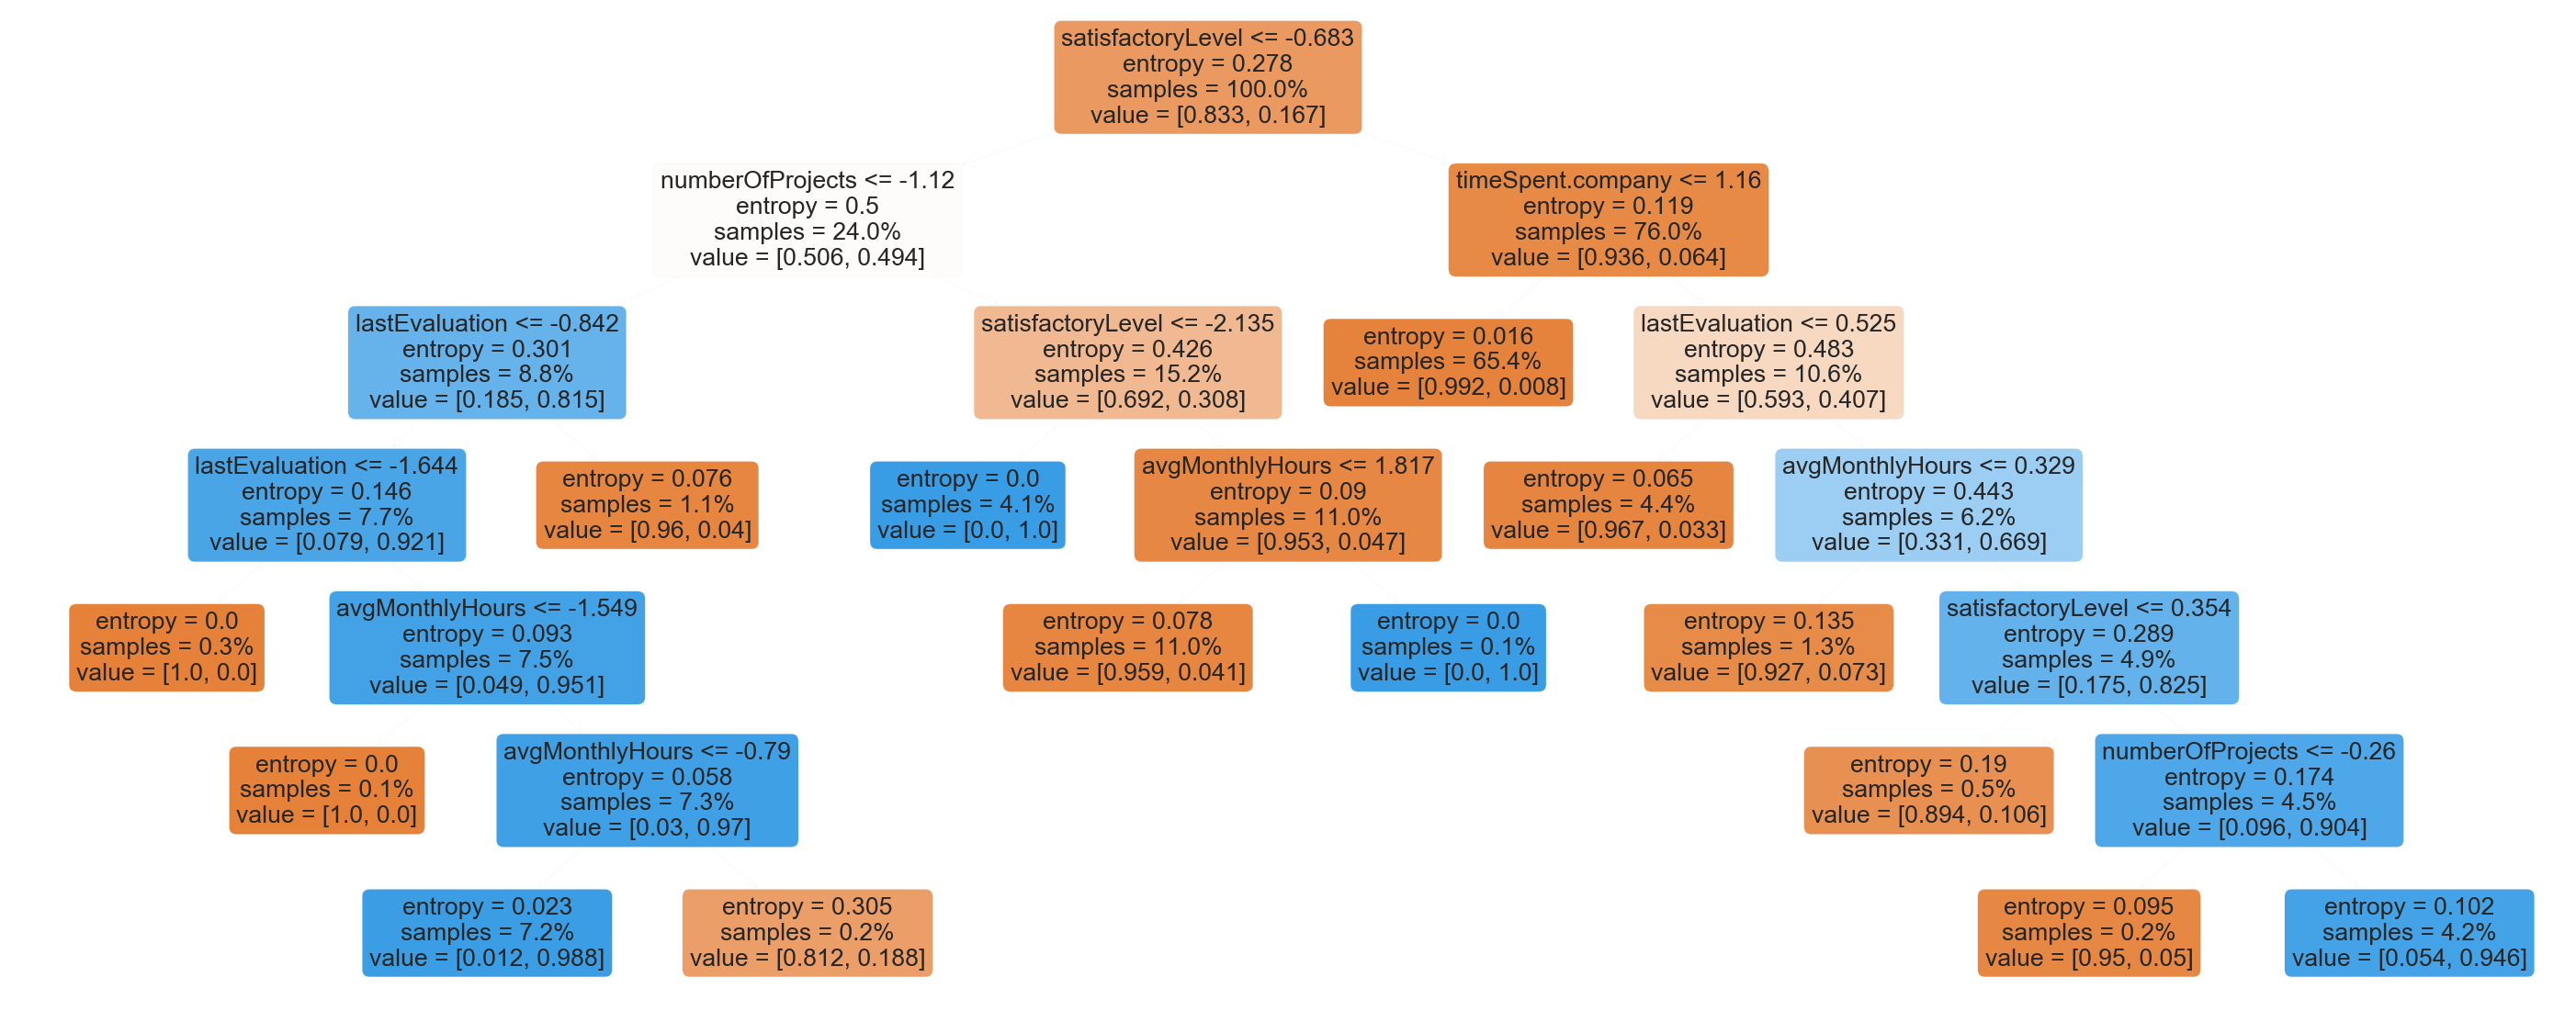

In [89]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))
tree.plot_tree(DTClassifier.fit(x_train,y_train),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9774906210921217

In [91]:
from sklearn import metrics
probab=DTClassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('DecisionTreeclassifier',DTClassifier.score(x_test,y_test)*100))
ROC_ls.append(('DecisionTreeclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.960016464371865


array([2.        , 1.        , 0.98838897, 0.94594595, 0.1875    ,
       0.10638298, 0.07258065, 0.05      , 0.04091342, 0.03960396,
       0.03341289, 0.00812749, 0.        ])

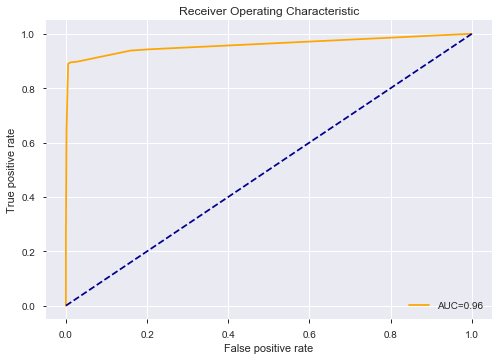

In [92]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Random Forest

In [93]:
#Applying Random Forest on the dataset
RFclassifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
RFclassifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
#Predicting the y values using random forest classifier for the x_test data
prediction = RFclassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
from sklearn.metrics import confusion_matrix
print("Random Forest Score=",RFclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Random Forest Score= 97.79074614422676
Confusion Matrix is :
[[2003    6]
 [  47  343]]


In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction)

0.9779074614422676

In [97]:
from sklearn import metrics
probab=RFclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('RandomForestclassifier',RFclassifier.score(x_test,y_test)*100))
ROC_ls.append(('RandomForestclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.9648370792970097


array([2. , 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

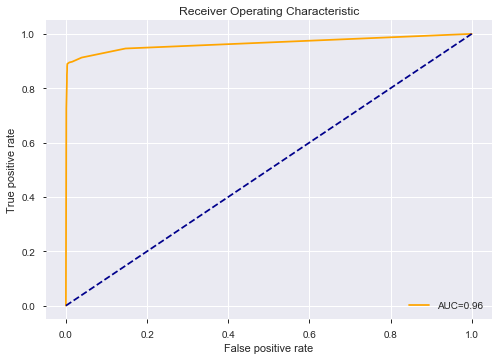

In [98]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# AdaBoost Classifier

In [105]:
#Applying Adaboost classifier on the data set
abclassifier=AdaBoostClassifier(n_estimators=100)
abclassifier.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [106]:
#Predicting the y values using adaboost classifier on x_test set
prediction = abclassifier.predict(x_test)
print("Adaboost Score=",abclassifier.score(x_test,y_test)*100)

Adaboost Score= 96.040016673614


In [107]:
prediction = abclassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
from sklearn.metrics import confusion_matrix
print("Adaboost classifier Score=",abclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Adaboost classifier Score= 96.040016673614
Confusion Matrix is :
[[1974   35]
 [  60  330]]


In [109]:
from sklearn import metrics
probab=abclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('Adaboostclassifier',abclassifier.score(x_test,y_test)*100))
ROC_ls.append(('Adaboostclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.9715702416050847


array([1.6992365 , 0.6992365 , 0.69853827, 0.69849136, 0.6982692 ,
       0.69790079, 0.69717673, 0.69419882, 0.66892535, 0.61406786,
       0.61397151, 0.58536114, 0.58485628, 0.58388689, 0.58343565,
       0.58334173, 0.58324291, 0.58260132, 0.58229065, 0.58195286,
       0.58186911, 0.53097318, 0.52970281, 0.51102254, 0.51060567,
       0.50965133, 0.50954082, 0.5093868 , 0.5092098 , 0.50913913,
       0.5088493 , 0.50869295, 0.50868312, 0.50860067, 0.50827001,
       0.50812464, 0.507914  , 0.50782748, 0.50758143, 0.50733972,
       0.50732162, 0.50716199, 0.50711188, 0.50708523, 0.5070562 ,
       0.50684895, 0.50635983, 0.50634755, 0.50625405, 0.50604679,
       0.50599046, 0.50598801, 0.50593474, 0.50583918, 0.50580775,
       0.50572748, 0.50556775, 0.50539487, 0.50528242, 0.50518891,
       0.50487153, 0.50486959, 0.50443263, 0.50439334, 0.50437332,
       0.50435787, 0.50424722, 0.50403994, 0.5038122 , 0.50363718,
       0.5034555 , 0.5033344 , 0.50320818, 0.503182  , 0.50314

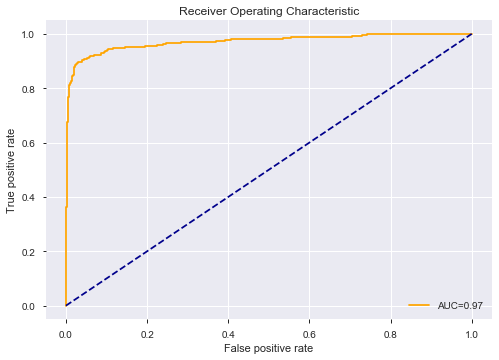

In [110]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# Gradient Boost

In [111]:
#Applying Gradient boost on the data set
gbclassifier=GradientBoostingClassifier(n_estimators=100)
gbclassifier.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [112]:
#Predicting the y values for x_test set
prediction = gbclassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
from sklearn.metrics import confusion_matrix
print("Gradiantboost classifier Score=",gbclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

Gradiantboost classifier Score= 97.58232596915381
Confusion Matrix is :
[[1990   19]
 [  39  351]]


In [114]:
from sklearn import metrics
probab=gbclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
ROC_ls.append(('Gradientboostclassifier',roc_auc))
Acc_ls.append(('Gradientboostclassifier',gbclassifier.score(x_test,y_test)*100))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.9739633189110541


array([1.99265876e+00, 9.92658759e-01, 9.92644361e-01, 9.92442815e-01,
       9.91459636e-01, 9.91287104e-01, 9.90356964e-01, 9.89671037e-01,
       9.89255691e-01, 9.88932492e-01, 9.88652198e-01, 9.88630404e-01,
       9.88630032e-01, 9.88342550e-01, 9.88319787e-01, 9.84046513e-01,
       9.83846820e-01, 9.82448695e-01, 9.76532117e-01, 9.75066868e-01,
       9.74396117e-01, 9.67372413e-01, 9.67174427e-01, 9.66816907e-01,
       9.66298692e-01, 9.65931970e-01, 9.64315139e-01, 9.63366012e-01,
       9.59419145e-01, 9.58254529e-01, 9.57997114e-01, 9.57151368e-01,
       9.56887457e-01, 9.56640297e-01, 9.55915121e-01, 9.55305846e-01,
       9.48700312e-01, 9.45006089e-01, 9.43573442e-01, 9.39402399e-01,
       9.37369269e-01, 9.35677875e-01, 9.34076551e-01, 9.33765818e-01,
       9.19803744e-01, 9.09588750e-01, 9.07323931e-01, 9.01146576e-01,
       8.98913008e-01, 8.91937277e-01, 8.88070973e-01, 8.85523737e-01,
       8.85335079e-01, 8.83214522e-01, 8.83115483e-01, 8.80675661e-01,
      

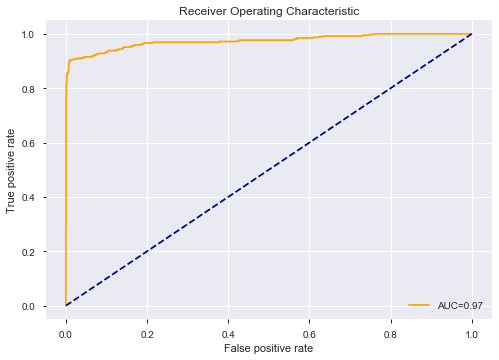

In [115]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

# XGboost

In [122]:
#Applying xgboost classifier on the data set
xgbclassifier=XGBClassifier(n_estimators=1000)
xgbclassifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [123]:
#Predicting the y-values for x_test set
prediction = xgbclassifier.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
#Accuracy calculation
from sklearn.metrics import confusion_matrix
print("XGboost classifier Score=",xgbclassifier.score(x_test,y_test)*100)
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix is :",cm,sep='\n')

XGboost classifier Score= 97.49895789912463
Confusion Matrix is :
[[1990   19]
 [  41  349]]


In [125]:
from sklearn import metrics
probab=xgbclassifier.predict_proba(x_test)
prob_positive = probab[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
Acc_ls.append(('XGboostclassifier',xgbclassifier.score(x_test,y_test)*100))
ROC_ls.append(('XGboostclassifier',roc_auc))
print('Area under the curve :',roc_auc)
threshold

Area under the curve : 0.9774284948500976


array([1.99999762e+00, 9.99997616e-01, 9.99982238e-01, 9.99980211e-01,
       9.99976754e-01, 9.99972820e-01, 9.99947667e-01, 9.99946713e-01,
       9.99937773e-01, 9.99937057e-01, 9.94292140e-01, 9.94074285e-01,
       9.91280138e-01, 9.91014183e-01, 9.78579998e-01, 9.78006363e-01,
       9.56479788e-01, 9.55773711e-01, 9.43951726e-01, 9.43175316e-01,
       9.33967769e-01, 9.28133607e-01, 9.11092877e-01, 9.08198118e-01,
       8.82654786e-01, 8.79488409e-01, 7.30789602e-01, 7.22792625e-01,
       7.19826519e-01, 6.98117971e-01, 6.84815943e-01, 6.75660968e-01,
       6.13370836e-01, 5.92554510e-01, 5.89434862e-01, 5.60617566e-01,
       5.30638039e-01, 4.89235550e-01, 4.47270572e-01, 4.30388957e-01,
       4.15767521e-01, 2.88302481e-01, 2.88283914e-01, 1.98685065e-01,
       1.81013957e-01, 1.55603781e-01, 1.55160084e-01, 1.32592902e-01,
       1.28944263e-01, 1.11792631e-01, 1.11360155e-01, 1.06890924e-01,
       1.04249366e-01, 8.26269090e-02, 8.05651769e-02, 7.93963969e-02,
      

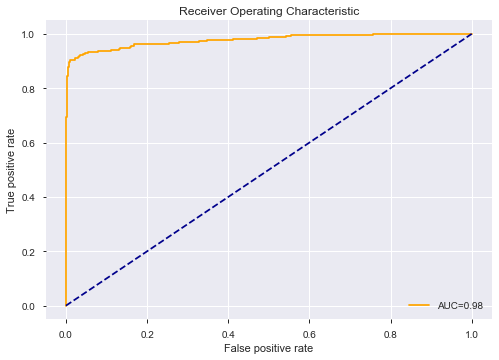

In [126]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'orange',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [127]:
Classifiers=[]
ROC_Score=[]
for i in range(len(ROC_ls)):
    Classifiers.append(ROC_ls[i][0])
for i in range(len(ROC_ls)):
    ROC_Score.append(ROC_ls[i][1])
ROC_ls

[('KNNclassifier', 0.9487946523901041),
 ('Logisticclassifier', 0.8595667714021333),
 ('GaussianNBclassifier', 0.8567293333843857),
 ('DecisionTreeclassifier', 0.960016464371865),
 ('RandomForestclassifier', 0.9648370792970097),
 ('Adaboostclassifier', 0.9715702416050847),
 ('Gradientboostclassifier', 0.9739633189110541),
 ('XGboostclassifier', 0.9774284948500976)]

In [128]:
ROC_ls[0][0]

'KNNclassifier'

In [129]:
Acc_ls

[('KNNclassifier', 95.12296790329304),
 ('Logisticclassifier', 83.65985827428095),
 ('GaussianNBclassifier', 83.8682784493539),
 ('DecisionTreeclassifier', 97.74906210921218),
 ('RandomForestclassifier', 97.79074614422676),
 ('Adaboostclassifier', 96.040016673614),
 ('Gradientboostclassifier', 97.58232596915381),
 ('XGboostclassifier', 97.49895789912463)]

In [130]:
Accuracy=[]
for i in range(len(Acc_ls)):
    Accuracy.append(Acc_ls[i][1])

In [131]:
Classifier_DF=pd.DataFrame({'Classifiers':Classifiers,'ROC_Score':ROC_Score,'Accuracy':Accuracy})

In [132]:
Classifier_DF['ROC_Score']=Classifier_DF['ROC_Score']*100

In [133]:
Classifier_DF.sort_values(ascending=False,by='ROC_Score')

Classifiers  ROC_Score   Accuracy
7        XGboostclassifier  97.742849  97.498958
6  Gradientboostclassifier  97.396332  97.582326
5       Adaboostclassifier  97.157024  96.040017
4   RandomForestclassifier  96.483708  97.790746
3   DecisionTreeclassifier  96.001646  97.749062
0            KNNclassifier  94.879465  95.122968
1       Logisticclassifier  85.956677  83.659858
2     GaussianNBclassifier  85.672933  83.868278

# Observations:

## Which model gives best accuracy and why?
### Random Forest is showing the best accuracy , the reason might be multiple Decision tree validations happening internally resulted in finding the best accurate model for predictions.

## Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s?
### I think accuracy is not the best performance evaluation metric because accuracy is the calculation we apply on the particular points bur ROC is the evaluation which considers the whole groups and evaluates the accuracy along with considering the sensitivity and specificity as well as the overall accuracy varies from different cutpoint.

## As we can observe from above Data Frame both accuracy and ROC_score can be considered as two metrics to find the best model 
## ROC_score is the measure of how well a parameter can distinguish between two diagnostic groups.So, considering ROC Score XGBoost Classifier is observed as best model for this data set to find the classifications.